# Data Science Pragmatic programming in Python


refs:
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
* https://tomaugspurger.github.io/modern-5-tidy.html

Code snippets for quick consult (copy n paste)

In [1]:
import os
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import IPython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [11]:
!pwd

/home/leandroohf/leandro/ds_pragmatic_programming


## Bash

### Random sample

In [ ]:
%%bash 
# take random sample of lines in file (log analysys was useful)

shuf data/FremontBridge.csv | head -n 3 

# option
shuf -n 3 data/FremontBridge.csv  

### Filter with grep

In [4]:
%%bash 

# Use grep to filter out pattern
cat data/FremontBridge.csv | grep -v 2013 | head -n 5

echo
# keep only 2013 and ignore case sensitive
cat data/FremontBridge.csv | grep -i 2013 | head -n 5

# Using regular expression (start with 12)
echo
cat data/FremontBridge.csv | grep -E "^12" | head -n 5

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
02/28/2019 11:00:00 PM,5,6
02/28/2019 10:00:00 PM,4,27
02/28/2019 09:00:00 PM,16,32
02/28/2019 08:00:00 PM,16,50

12/31/2013 11:00:00 PM,17,5
12/31/2013 10:00:00 PM,10,4
12/31/2013 09:00:00 PM,5,6
12/31/2013 08:00:00 PM,13,23
12/31/2013 07:00:00 PM,21,17

12/31/2018 11:00:00 PM,7,6
12/31/2018 10:00:00 PM,3,4
12/31/2018 09:00:00 PM,7,7
12/31/2018 08:00:00 PM,12,14
12/31/2018 07:00:00 PM,9,5


### run process in parallel

Use pararlels to speedup bash


In [ ]:
# Creating scripts

bash_str = """\
ffmpeg -y -i data/audio0_hH79HnEdo.wav data/audio0_hH79HnEdo.flac
ffmpeg -y -i data/audio0KCVgexi4yU.wav data/audio0KCVgexi4yU.flac
ffmpeg -y -i data/audio0Q1JLNfm8oU.wav data/audio0Q1JLNfm8oU.flac
ffmpeg -y -i data/audio0vm7UpkSOnk.wav data/audio0vm7UpkSOnk.flac
ffmpeg -y -i data/audio2M9GSksX_ho.wav data/audio2M9GSksX_ho.flac
"""

!echo "{bash_str}"   > convert.sh 
!chmod u+x convert.sh

!cat convert.sh

In [ ]:
# serial
!time ./convert.sh

In [ ]:
# parallel will run every line as a separate command in parallel
!/usr/bin//parallel -a ./convert.sh

In [ ]:
# piping version
!ls data/*.wav | parallel ffmpeg -i {} {.}.flac

## Notebooks tricks 


### List of useful magick commands

```python

# laod/write code from file to cell/cell code to file 
%load exmply.py
%%writefile example.py

# run files or notebook
%run hello.py

%%time
```

### List of useful extensions


For installation: https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html
```sh
# install py package
pip install jupyter_contrib_nbextensions

# install javascripts and css
jupyter contrib nbextension install --user

# enabling and disabling extension  (You can do in the UI)
jupyter nbextension enable codefolding/main

```

nbextensions:
1. Table of contents
1. Autopep8
1. code prettify
1. highlither (ds meetings progress report)
1. Collapsable Headings
1. Variable inspector
1. Toggle al line numbers
1. Rise for small presentations
1. jupyter_resource_usage

    ```sh
    pip install jupyter-resource-usage
    ```

1. watermark (print sys info, python versions n installed packages versions)

    ```sh
    pip install watermark
    ```


### For orgmode tables

In [8]:
!pip --version
!pip install tabulate

!python --version

import sys

sys.version

pip 21.3.1 from /home/leandroohf/.local/lib/python3.6/site-packages/pip (python 3.6)
Defaulting to user installation because normal site-packages is not writeable
Python 3.6.15


'3.7.12 (default, Jan 15 2022, 18:42:10) \n[GCC 9.3.0]'

In [5]:
from tabulate import tabulate
import pandas as pd

table = pd.DataFrame({
           "a": [1,2,3],
           "b": [4.123,5.345,6.333]
       })

print(tabulate(table, headers=["Planet","R (km)", "mass (x 10^29 kg)"]))
print()

print("orgmode format")

print(tabulate(table, headers=table.columns, tablefmt="orgtbl"))

print()
print("Markdown Github: controling index and format")
print(tabulate(table, headers=table.columns, floatfmt=".2f", showindex=False, tablefmt="github"))

  Planet    R (km)    mass (x 10^29 kg)
--------  --------  -------------------
       0         1                4.123
       1         2                5.345
       2         3                6.333

orgmode format
|    |   a |     b |
|----+-----+-------|
|  0 |   1 | 4.123 |
|  1 |   2 | 5.345 |
|  2 |   3 | 6.333 |

Markdown Github: controling index and format
|    a |    b |
|------|------|
| 1.00 | 4.12 |
| 2.00 | 5.34 |
| 3.00 | 6.33 |


* **HTML**

<table>
<thead>
<tr><th style="text-align: right;">  Planet</th><th style="text-align: right;">  R (km)</th><th style="text-align: right;">  mass (x 10^29 kg)</th></tr>
</thead>
<tbody>
<tr><td style="text-align: right;">       0</td><td style="text-align: right;">       1</td><td style="text-align: right;">                  4</td></tr>
<tr><td style="text-align: right;">       1</td><td style="text-align: right;">       2</td><td style="text-align: right;">                  5</td></tr>
<tr><td style="text-align: right;">       2</td><td style="text-align: right;">       3</td><td style="text-align: right;">                  6</td></tr>
</tbody>
</table>
 
 
* Jupyter notebook and Github markdown

|    |   a |   b |
|----|-----|-----|
|  0 |   1 |   4 |
|  1 |   2 |   5 |
|  2 |   3 |   6 |

* Orgmode 

```text
orgmode format
|    |   a |   b |
|----+-----+-----|
|  0 |   1 |   4 |
|  1 |   2 |   5 |
|  2 |   3 |   6 |
```

### How to install kernels 

* *Install conda enviroment in jupyter notebook*


```sh
# activate the env
source activate myenv

# install ipiykernel in the environment
conda install ipykernel

# with pip (pip is lees problematic than conda)
pip install --user ipykernel

# jupyter will auto-detect all environments
# In case it fails you can un
python -m ipykernel install --user --name myenv

```

* Set jupyter notebook to save a copy as Rmd

refs: https://towardsdatascience.com/version-control-with-jupyter-notebooks-f096f4d7035a

Why?  

* R-Markdown is the same as markdown format with added advantage that you can make publishing worthy pdf/word-doc 
* git diff renders well is human readable (Cons duplicated the numner of files)



Install pytext (requirment to save as Rmd)
```sh
pip install jupytext --upgrade
```

Edit jupyter conf file: jupyter/jupyter_notebook_config.py

```txt
c.NotebookApp.contents_manager_class="jupytext.TextFileContentsManager"
c.ContentsManager.default_jupytext_formats = ".ipynb,.Rmd"
```


Add this magic command in the first cell


```python
%autosave 0
```


* *Install kernel enviroment in jupyter notebook *

### Run notebook in remote jupyter server


```sh
# run in thew remote machine
jupyter notebook --no-browser --port 8889

# run local machine
ssh -N -f -L localhost:8888:localhost:8889 datalab@172.21.1.4

# Copy token from the remote machine shell
# access jupyter notebook
http://localhost:8888/?token=054a85cc962d8c7ee5ba99517bfc5303020c7e2736f4b268

```

### Share variables between python and bash cell

This can help with interacting with shell


In [ ]:
python_var = 'test1'
var_test2 = 10.3

# Option 1
data =  './mydata'

!mkdir -p {data}

In [ ]:
%%bash -s "$python_var" "$var_test2" "position_3"

echo $1
echo $2
echo $3
echo $data ## will not work

* define enviroment variable shared between bash cells

In [3]:
%env MY_VAR=env_test_var
%env  v1=$python_var

env: MY_VAR=env_test_var
env: v1=$python_var


In [4]:
%%bash 

echo $MY_VAR
echo $v1

env_test_var
$python_var


### Share variables between notebooks

In [ ]:
# Notebook 1 (Should be ran first)
# Define the var
share = 'This is shared variable'


# Make the varaible Global between notebooks
%store share 

# Notebook 2 
# Read global variable
%store -r share

### Refactor and inspect files inside notebook

This magick commands should be useful for refactor and inspecting code inside notebook

In [6]:
%%writefile example.py

import pandas as pd

print("hello word from py")

Writing example.py


In [7]:
!cat example.py


import pandas as pd

print("hello word from py")


For run load you need:

1. put in the first line of the cell: ```%load example.py```
1. Enter 

In [ ]:
# %load example.py

import pandas as pd

print("hello word from py")


### **Run R code in cell**

In [ ]:
# enables the %%R magic, not necessary if you've already done this
%load_ext rpy2.ipython

import pandas as pd
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})

In [ ]:
%%R -i df -w 3 -h 2 --units in -r 200
# import df from global environment
# make default figure size 3 by 3 inches with 200 dpi resolution

install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
ggplot(df, aes(x=cups_of_coffee, y=productivity)) + geom_line()

### Using debugers

You can use the python debugger pdb to step through code.

* add pdb.set_trace() to set a breakpoint
* %debug magic to trace an error. Pop up debug in the point of the error in last cell ran


Commands you need to know:

1. s (step i func or method) / n (next) / c (continue)
1. u (step out or upper context) / d
1. p (print var) but you can type the varname in the debug shell
1. l (centralize and print line code context)
5. q (quit)

In [2]:
def do_magick(k,x):
    
    import pdb; pdb.set_trace()  # <=== breakpoint
    res = k + x
    
    return res

for k, x in enumerate(range(5)):
    
    
    i = k + 1
    res = do_magick(i,x)


> <ipython-input-2-5e03f986ef68>(4)do_magick()
-> res = k + x
(Pdb) n
> <ipython-input-2-5e03f986ef68>(6)do_magick()
-> return res
(Pdb) k
1
(Pdb) x
0
(Pdb) i
1
(Pdb) res
1
(Pdb) c
> <ipython-input-2-5e03f986ef68>(4)do_magick()
-> res = k + x
(Pdb) n
> <ipython-input-2-5e03f986ef68>(6)do_magick()
-> return res
(Pdb) res
3
(Pdb) c
> <ipython-input-2-5e03f986ef68>(4)do_magick()
-> res = k + x
(Pdb) c
> <ipython-input-2-5e03f986ef68>(4)do_magick()
-> res = k + x
(Pdb) c
> <ipython-input-2-5e03f986ef68>(4)do_magick()
-> res = k + x
(Pdb) c


In [3]:
s = [k for k in range(7)]

for k in range(7):
    
    x = s[k*10]

IndexError: list index out of range

In [4]:
%debug

> <ipython-input-3-e7dc8ea899e4>(5)<module>()
      1 s = [k for k in range(7)]
      2 
      3 for k in range(7):
      4 
----> 5     x = s[k*10]

ipdb> l
      1 s = [k for k in range(7)]
      2 
      3 for k in range(7):
      4 
----> 5     x = s[k*10]

ipdb> len(s)
7
ipdb> k
1
ipdb> k*10
10
ipdb> c


### Embbeding image, URls, PDFs, link to sections and videos

```HTML
<img src="images/data_frame.png" width="800" align="left"/>
```

In [27]:
#Note that http urls will not be displayed. Only https are allowed inside the Iframe
from IPython.display import IFrame
IFrame('https://en.wikipedia.org/wiki/HTTPS', width=900, height=400)


In [29]:
IFrame('https://arxiv.org/pdf/1406.2661.pdf', width=800, height=450)

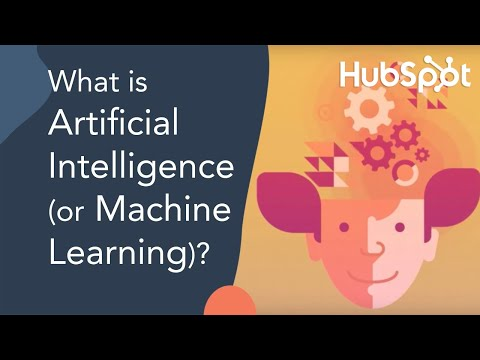

In [66]:
from IPython.display import YouTubeVideo
YouTubeVideo('mJeNghZXtMo', width=800, height=300)

### Markdown tricks

* How to reference a section: https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown

    * tag the section: ```<a id='another_cell'></a>``` <= this will become invisible  <a id='another_cell'></a>
    * make a reference to the tagged cell: [Another Cell](#another_cell)
    
* Help creates table: 
    * online: https://www.tablesgenerator.com/markdown_tables
    * convert from org-mode replace("-+-","-|-")
    
* Latex: $x \sim N(\mu, \sigma^ 2)$

### Presentations with RISE

https://rise.readthedocs.io/en/stable/



* RISE allows you to edit
* Select the cells to show and hide
* Create slides and sub slides


Install preferable conda

```sh
conda install -c conda-forge rise

# install the JS and CSS in the proper places
jupyter-nbextension install rise --py --sys-prefix

#enable the nbextension:
jupyter-nbextension enable rise --py --sys-prefix

```

### How to get help, inspecting python files and objects


In [4]:
import xgboost as xg


params= {"n_estimators": 2000, "subsample" : 0.9, "colsample_bytree" : 0.5,  "max_depth":9, "min_child_weight":  1,"gamma":2,"learning_rate": 0.05,  "random_state":1,"n_jobs":45 }
regressor = xg.XGBRegressor(**params)

#help(regressor) or ?regressor or ??regressor

In [ ]:

print("Get list of all methods")
dir(regressor)

In [10]:
str(regressor)

'XGBRegressor(colsample_bytree=0.5, gamma=2, learning_rate=0.05, max_depth=9,\n             n_estimators=2000, n_jobs=45, random_state=1, subsample=0.9)'

In [8]:
import inspect

def foo(x):
    
    print(f"foo: {x}")
    
    return x**2

print(inspect.getsource(foo))

def foo(x):
    
    print(f"foo: {x}")
    
    return x**2



```python 
# Get documentation
help(len)
len?

# inspect source code
len??


# object. <TAB> to inspect objects
# Do not know all the time. But for imported packages does work
pd.<TAB> # should work

# <TAB> also works when import modules
from itertools import co<TAB>


# wildcards
*Warning?  # List every obj in namespace that ends with Warning
str.*find*?  # look for string method that contains the string find in the middle
```

In [2]:
str.*find*?

In [1]:
!cat utils.py

%pycat utils.py

# * *************************************************************************
#   Programmer[s]: Leandro Fernandes
#   email: leandroohf@gmail.com
#   Program: utils
#   Commentary: My utils to help with processing data
#   Reference: https://www.thoughtworks.com/insights/blog/coding-habits-data-scientists
#   Date: February 6, 2020
#
#   The author believes that share code and knowledge is awesome.
#   Feel free to share and modify this piece of code. But don't be
#   impolite and remember to cite the author and give him his credits.
# * *************************************************************************

import functools
import zipfile
import pandas as pd
import numpy as np

# Shameless inspired from the comments of
# https://www.thoughtworks.com/insights/blog/coding-habits-data-scientists
def compose(*functions):
    """Ex: prepare_data = compose(functools.partial(encode_column, col_name='item'),
                       add_categorical_column,
                       convert_to_

### Execute notebook or python file

In [43]:
!echo "print('Helo word')" > hello.py
%run hello.py

Helo word


### Notebook diff

https://nbdime.readthedocs.io/en/latest/

* nbdime

Show code, markdown, output and graph different betwee versions

Install nbdime

```sh
pip install nbdime
```

To get the diff in the web browser
```sh
nbdiff-web intro_gradient_algos.ipynb
```

***Troubleshooting**

If buttom git nbdiff is not clickable, most likely nbdiff is not in the path. You might need todo source ~/.zshrc

## Python common tricks

In [38]:
#get the size of object
import sys
print(sys.getsizeof(data)/1e3/1e3) # in bytes

0.227963


In [4]:
a = 0
b = 2

x = a or b
x

x = a if a else b
x

2

2

* List and dict comprehension

In [44]:
x = [k if k % 2. == 0 else -1 for k in range(5)]
x

# idendity
X = [[1 if r == c else 0 for r in range(3)] for c in range(2)]
X

[[1]*3 for c in range(2)]


# list of list 
x = [[1,2,3],[4,5,6],[7,8,9]]
y = [k+1 for group in x for k in group]
y

y = [[number+1 for number in group] for group in x]
y

print("Dictionaries")

dict1 = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}

# Double each value in the dictionary
{k:v*2 for (k,v) in dict1.items()}

[0, -1, 2, -1, 4]

[[1, 0, 0], [0, 1, 0]]

[[1, 1, 1], [1, 1, 1]]

[2, 3, 4, 5, 6, 7, 8, 9, 10]

[[2, 3, 4], [5, 6, 7], [8, 9, 10]]

Dictionaries


{'a': 2, 'b': 4, 'c': 6, 'd': 8, 'e': 10}

* sorted and collections counter
    * https://docs.python.org/3/library/collections.html#collections.Counter

In [17]:
from collections import Counter

cnt = Counter()
for word in ['red', 'blue', 'red', 'green', 'blue', 'blue']:
    cnt[word] += 1

cnt

c = Counter('gallahad')
c 
c['b']
c['c'] = 1
c
del c['c']
c

Counter({'red': 4, 'blue': 2})
Counter(cats=4, dogs=8) 
    
# sorting
c = Counter(a=4, b=2, c=0, d=-2)
sorted(c.elements())


# subtract
c.subtract('a')
c
    
Counter('abracadabra').most_common(3)

Counter({'red': 2, 'blue': 3, 'green': 1})

Counter({'g': 1, 'a': 3, 'l': 2, 'h': 1, 'd': 1})

0

Counter({'g': 1, 'a': 3, 'l': 2, 'h': 1, 'd': 1, 'c': 1})

Counter({'g': 1, 'a': 3, 'l': 2, 'h': 1, 'd': 1})

Counter({'red': 4, 'blue': 2})

Counter({'cats': 4, 'dogs': 8})

['a', 'a', 'a', 'a', 'b', 'b']

Counter({'a': 3, 'b': 2, 'c': 0, 'd': -2})

[('a', 5), ('b', 2), ('r', 2)]

In [20]:
from collections import namedtuple


Point = namedtuple('Point', ['x', 'y'])
p1 = Point(x=11, y=22)
p2 = Point(-1,1)

p1 + p2   # <=== not what you normally want

p1.x
p1.y


(11, 22, -1, 1)

11

22

In [29]:
from collections import deque

# queue that can pop from both sides
de = deque([1,2,3])

de.append(4)
de.appendleft(0)
de


de.pop()
de


de.popleft()
de

deque([0, 1, 2, 3, 4])

4

deque([0, 1, 2, 3])

0

deque([1, 2, 3])

* dictionary

In [51]:
# get items, values and keys
x = {'a': 1, 'e': 4, 'i': 3, 'o': 1, 'u': 0}
x.items()  # iterator
x.keys()   # iterator
x.values() # iterator

# get with defaults if not found
x.get('a',-1)
x.get('v',-1)

print("sorting")
# sorting dictionary by values
x = {'a': 1, 'e': 4, 'i': 3, 'o': 1, 'u': 0}
sorted(x.items(), key=lambda item: item[1], reverse=True)
sorted(x.values(),reverse=True)  # only values


# sorting dictionary by keys
x = {'a': 1, 'e': 4, 'i': 3, 'o': 1, 'u': 0}
sorted(x.items(), key=lambda item: item[0], reverse=True)
sorted(x, key=x.get, reverse=True)  # return only the leys


dict_items([('a', 1), ('e', 4), ('i', 3), ('o', 1), ('u', 0)])

dict_keys(['a', 'e', 'i', 'o', 'u'])

dict_values([1, 4, 3, 1, 0])

1

-1

sorting


[('e', 4), ('i', 3), ('a', 1), ('o', 1), ('u', 0)]

[4, 3, 1, 1, 0]

[('u', 0), ('o', 1), ('i', 3), ('e', 4), ('a', 1)]

['e', 'i', 'a', 'o', 'u']

* map (functional programming): **Processing Iterables Without a Loop**

In [42]:
from functools import reduce

# map 
numbers = [1, -2, -3, 4, 5]
list(map(lambda x: x*x, numbers))

string_it = ["processing  ", "  strings", "with", "map"]
list(map(str.strip,map(str.capitalize, string_it)))

# filter
list(filter(lambda x: x > 0, numbers))

# reduce 
reduce((lambda x, y: x * y), [1, 2, 3, 4])
reduce((lambda x, y: x + y), [1, 2, 3, 4])

[1, 4, 9, 16, 25]

['Processing', 'strings', 'With', 'Map']

[1, 4, 5]

24

10

* Use `any()` or `all()`:  clearly shows the intentions of the code

In [6]:
l = [1,2,3,4]

found = any(e == 3 for e in l)
found

# error checks: check if all is less than 0.5
errors = [0.1, 0.02, 0.3, 0.25]

check = all(e < 0.5 for e in errors)
check

True

True

* see the contents of a pickle file

```python
import pickle

# dumb object to disk (serialize object)
with open('cookies.pck', "wb") as f:

    pickle.dump(imdb_cookies, f)
    f.flush()

# read object form disk (deserialize object)
with open(self.cookie_file, "rb") as f:
    imdb_cookies_as_dict= pickle.load(f)
   
```

Shell: View object
```shell
python -mpickle cookies.pck
```

## Generate data 

* random numbers generation
* generate data
* load data sets (toy)

http://scikit-learn.org/stable/datasets/index.html

### Gen random numbers

* uniform
* normal
* multivariate
* bolean
* integer

In [ ]:
## random numbers
np.random.seed(seed=2018)

n = 3
a = np.random.rand(n,n)

# random boolean
b = np.random.uniform(size=3) > .5
b

# uniform
u = np.random.uniform(size=3)
u

# random int
i = np.random.randint(0,9,size=3)
i

# random choice
c = np.random.choice(['a','b','c','e'],size=7)
c

# normal
n = np.random.normal(size=5)
n

# multivariated normal 2d;
_mean = (1, 2)
_cov = [[1, 0], [0, 1]]
m = np.random.multivariate_normal(_mean, _cov, 3 )
m.shape
m

### Create dataframes

In [ ]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}

pd.DataFrame.from_dict(data)


data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data, orient='index')



# HOW to fixe: If using all scalar values, you must pass an index
# pd.DataFrame.from_dict({'col1': 1, 'col2': 3}) # <= RUN THIS LINE TO SEE THE ERROR
#pd.DataFrame({'A': 1, 'B': 2}) # # <= RUN THIS LINE TO SEE THE ERROR
pd.DataFrame({'A': 1, 'B': 2}, index=[0])

# OR
pd.DataFrame({'A': [1], 'B': [2]})

### Gen data for classifications and clustering

Shameless stolen from:
http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html#sphx-glr-auto-examples-datasets-plot-random-dataset-py


* **make_classification** create multiclass datasets by allocating each class one or more **normally-distributed** clusters of points

   make_classification introducing noise by way of: correlated, redundant and uninformative features; multiple Gaussian clusters per class; and linear transformations of the feature space.

In [ ]:
## classification (normal distributed)
from sklearn.datasets import make_classification

plt.figure(figsize=(10, 15));

plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95);

X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

plt.subplot(321);
plt.title("One informative feature, one cluster per class", fontsize='small');
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)

plt.subplot(322);
plt.title("Two informative features, one cluster per class", fontsize='small');

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');


X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2)

plt.subplot(323);
plt.title("Two informative features, two clusters per class",
          fontsize='small');

plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')


X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3)

plt.subplot(324);
plt.title("Multi-class, two informative features, one cluster",
          fontsize='small');

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');

plt.show();

* **make_blobs**: Generate isotropic (uniformity in all orientations) Gaussian blobs for clustering. 

* **make_gaussian_quantiles**: Generate isotropic Gaussian and label samples by quantile

In [ ]:
## Blobs n gaussian qunatiles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

X1, Y1 = make_blobs(n_features=2, centers=3, random_state=2018)

plt.figure(figsize=(11,5));

ax1 = plt.subplot(121);
plt.title("Three blobs", fontsize='small');
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');

X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3,n_samples=256,random_state=2018)

ax2 = plt.subplot(122);
plt.title("Gaussian divided into three quantiles", fontsize='small');

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');

ax2.set_xlim(-4,4);
ax2.set_ylim(-4,4);

plt.show()

* **make_circles**: Make a large circle containing a smaller circle in 2d.

* **make_moons**: Make two interleaving half circles

In [ ]:
## Clustering
from sklearn.datasets import make_moons, make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.05, random_state=2018)

# scatter plot of original and reduced data
fig = plt.figure(figsize=(9, 8));

ax1 = plt.subplot(121,aspect='equal');
ax1.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k');
ax1.set_title("Circle Data (2d)");
ax1.set_xticks(());
ax1.set_yticks(());


X, y = make_moons(n_samples=400, noise=.05,random_state=2018)

ax2 = plt.subplot(122,aspect='equal');
ax2.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k');
ax2.set_title("Moons Data (2d)");
ax2.set_xticks(());
ax2.set_yticks(());

plt.tight_layout();
plt.show;


### Load data sets


* **load_iris** Load and return the iris dataset (classification).

<img src="images/iris_petal_sepal.png" width="250" align="left"/>


In [ ]:
## datasets

from sklearn.datasets import load_iris

# Load the Iris flower dataset:
iris = load_iris()
X_iris = iris.data
Y_iris = iris.target

print('data size: {}'.format(X_iris.shape))
print('features: {}'.format(iris.feature_names))
print('labels: {}'.format(iris.target_names))

print()

plt.figure(2, figsize=(4, 3));
plt.clf();

# Plot 
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=Y_iris, cmap=plt.cm.Set1,
            edgecolor='k');
plt.xlabel('Sepal length');
plt.ylabel('Sepal width');

* **load_boston**: Load and return the boston house-prices dataset (regression).

In [ ]:
# Boston house pricing

from sklearn.datasets import load_boston

boston = load_boston()

print('data size: {}'.format(boston.data.shape))
print('features: {}'.format(boston.feature_names))

# convert to data frame (but may times is not necessary)
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names

boston_df['target'] = boston.target

boston_df.head(4)

In [ ]:
data = pd.read_csv('data/phone_data.csv')

data.shape
data.head(5)

## Read, write and explore  data

* pandas
* dict
* file handle


### Pandas

* **read from compressed csv**

In [ ]:
# See the first rows
pd.read_csv('data/phone_data.csv', nrows=2).head()
pd.read_csv('data/phone_data.csv', sep=',',header=None, index_col=False).head()

## load
creditcard_df = pd.read_csv('data/creditcard_downsampled.csv.tar.bz2', compression='bz2', 
                            sep=',', quotechar='"', index_col=False)

creditcard_df.head(3)

* **read from sql db**

In [9]:
# reads from database
import pandas as pd
import sqlite3

#conn = sqlite3.connect("data/flights.db")
with sqlite3.connect("data/flights.db") as conn:
    df = pd.read_sql_query("select * from airlines limit 11;", conn)
    
df.head(3)

,index,id,name,alias,iata,icao,callsign,country,active
0,0,1,Private flight,\N,-,None,None,None,Y
1,1,2,135 Airways,\N,None,GNL,GENERAL,United States,N
2,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y


In [10]:
df = pd.read_csv('data/phone_data.csv', index_col=False)

df.columns
df.drop('index',axis=1,inplace=True)

df.head(3)

Index(['index', 'date', 'duration', 'item', 'month', 'network',
       'network_type'],
      dtype='object')

,date,duration,item,month,network,network_type
0,15/10/14 06:58,34.429,data,2014-11,data,data
1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile


In [11]:
df.to_csv('tmp.csv',index=False)

!head tmp.csv

date,duration,item,month,network,network_type
15/10/14 06:58,34.429,data,2014-11,data,data
15/10/14 06:58,13.0,call,2014-11,Vodafone,mobile
15/10/14 14:46,23.0,call,2014-11,Meteor,mobile
15/10/14 14:48,4.0,call,2014-11,Tesco,mobile
15/10/14 17:27,4.0,call,2014-11,Tesco,mobile
15/10/14 18:55,4.0,call,2014-11,Tesco,mobile
16/10/14 06:58,34.429,data,2014-11,data,data
16/10/14 15:01,602.0,call,2014-11,Three,mobile
16/10/14 15:12,1050.0,call,2014-11,Three,mobile


### Explore data in pandas: Better dataframe view

* Filters. 
* **Filter date using calendars**
* Sort 
* **Scroll rows and columns**
* Full screen toggle

In [17]:
import qgrid

df.date = pd.to_datetime(df.date)

qgrid.show_grid(df, show_toolbar=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Basic and dict IO



* **process all files in folder**

In [14]:
import glob


notebooks = [x for x in glob.glob('*.ipynb')]

notebooks

for name in glob.glob('images/*.png'):
    print(os.path.basename(name))

    
print()

directory = './'

for filename in os.listdir(directory):
    
    print(filename)

['ds_pragmatic_programming_modelling.ipynb',
 'ds_pragmatic_programming_NLP.ipynb',
 'ds_pragmatic_programming_code_best_practices.ipynb',
 'ds_pragmatic_programming_python.ipynb',
 'ds_pragmatic_programming_python_time_series.ipynb',
 'ds_pragmatic_programming_python_visualization.ipynb',
 'ds_pragamatic_mongo_db.ipynb',
 'ds_pragmatic_programming_SQL.ipynb',
 'ds_pragmatic_programming_deeplearning.ipynb',
 'ds_pragmatic_programming_geodata.ipynb',
 'ds_pragmatic_programming_graph_data.ipynb',
 'ds_pragmatic_programming_spark.ipynb']

resampling.png
minibatch_learning_rate.png
pivot-table-datasheet.png
neuron_ANN.png
data_frame.png
iris_petal_sepal.png
tomek.png
non-linear_and_linear_decision_edge.png
learning_rate2.png
smote.png
no_data_pipeline.png
pathlib_cheatsheet_p1.png
with_data_pipeline.png
refactor_notebooks.png
biasvariance.png
hig_bias_low_variance.png
learning_rate.png
loss_learning_rate.png
split-apply-combine.png
low_high_var.png
irr_error.png
onehot.png
notebook_vs_code.png
add_data.png

tensorflow_requirements.txt
ds_pragmatic_programming_modelling.ipynb
data
ds_pragmatic_programming_NLP.ipynb
.git
ds_pragmatic_programming_code_best_practices.ipynb
.ipynb_checkpoints
ds_pragmatic_programming_python.ipynb
ds_pragmatic_programming_python_time_series.ipynb
requirements.txt
postBuild
ds_pragmatic_programming_python_visualization.ipynb
ds_pragamatic_mongo_db.ipynb
ds_pragmatic_programming_SQL.ipynb
tensorflow_cpu.yml
ds_pragmatic_programming_deeplearning.ipynb
README.md
Dockerfile-spark
ds_pragmatic_progr

* **dump dict to json file**

In [ ]:
import json

data = {}  
data['people'] = []  
data['people'].append({  
    'name': 'Scott',
    'website': 'stackabuse.com',
    'from': 'Nebraska'
})

with open('data.json', 'w') as outfile:  
    json.dump(data, outfile)
    
!cat data.json

with open('data.json', 'r') as f:
    datastore = json.load(f)
    
datastore

In [ ]:
!rm -v data/output.tsv

* **Write txt file line by line**

In [ ]:
# lazzy way
for k in range(0,3):
    
    if k % 2 == 0:
        print('Processing: {}'.format(k))

    score =  np.random.normal(size=1)[0]
    print("{k:d}\t{score:.2f}".format(k=k, score=score), file=open("data/output.tsv", "a"))

# better way
with open('data/output.txt', 'a') as f:
    for k in range(0,3):
    
        if k % 2 == 0:
            print('Processing: {}'.format(k))

        score =  np.random.normal(size=1)[0]
        print("{k:d}\t{score:.2f}".format(k=k, score=score), file=f)


In [ ]:
!cat data/output.tsv

In [ ]:
import csv

my_dict = {'key1': 'value_a', 'key2': 1, 'key3': 2.0}

# write
with open('data/dict.csv', 'w') as f:
    [f.write('{0},{1}\n'.format(key, value)) for key, value in my_dict.items()];


# read
with open('data/dict.csv', 'r') as csv_file:
    
    reader = csv.reader(csv_file)
    my_dict2 = dict(reader)
    
my_dict2

In [ ]:
!cat data/dict.csv

In [ ]:
dict_list = [ {'key1': 1, 'key2': 'a'}, {'key1': 2, 'key2': 'b'}]

fieldnames = dict_list[0].keys()

# write
with open('data/people.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
    dict_writer.writeheader()
    dict_writer.writerows(dict_list)
    
# read
with open('data/people.csv', mode='r') as infile:
    
    reader = csv.reader(infile)
    _ = next(reader, None)  # skip the headers
    mydict = [{'key1': rows[0], 'key2': rows[1]} for rows in reader]
    
mydict

In [ ]:
!cat data/people.csv

## Get data from internet 

In [ ]:
!curl -o data/FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [ ]:
bikes = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
bikes.head()

## Data wrangler (Remember, 80% of the project time is spent here)


### Get a list of files and Iterate over folders

ref:
* https://towardsdatascience.com/bringing-the-best-out-of-jupyter-notebooks-for-data-science-f0871519ca29
* https://www.newbedev.com/python/howto/how-to-iterate-over-files-in-a-given-directory/

* **Get a list of all notebooks**

In [6]:
files= !ls *.ipynb
print(files)

['ds_pragamatic_mongo_db.ipynb', 'ds_pragmatic_computer_vision.ipynb', 'ds_pragmatic_numpy_vectorization.ipynb', 'ds_pragmatic_programming_code_best_practices.ipynb', 'ds_pragmatic_programming_geodata.ipynb', 'ds_pragmatic_programming_graph_data.ipynb', 'ds_pragmatic_programming_modelling.ipynb', 'ds_pragmatic_programming_NLP.ipynb', 'ds_pragmatic_programming_python.ipynb', 'ds_pragmatic_programming_python_time_series.ipynb', 'ds_pragmatic_programming_python_visualization.ipynb', 'ds_pragmatic_programming_spark.ipynb', 'ds_pragmatic_programming_SQL.ipynb', 'ds_pragmatic_programming_tensorflow.ipynb', 'Untitled.ipynb']


* **Iterate over all images in the folder images**

In [42]:
!ls images

add_data.png		     no_data_pipeline.png
biasvariance.png	     non-linear_and_linear_decision_edge.png
data_frame.png		     notebook_vs_code.png
hig_bias_low_variance.png    onehot.png
iris_petal_sepal.png	     pathlib_cheatsheet_p1.png
irr_error.png		     pivot-table-datasheet.png
layers.jpeg		     refactor_notebooks.png
learning_rate2.png	     resampling.png
learning_rate.png	     smote.png
loss_learning_rate.png	     split-apply-combine.png
low_high_var.png	     tomek.png
minibatch_learning_rate.png  with_data_pipeline.png
neuron_ANN.png


In [37]:
root_folder = r'.'

for subdir, dirs, files in os.walk(root_folder):
    
    print('subdir: {}'.format(subdir))
    print('dir: {}'.format(dirs))
    print('files: {}'.format(files))
    
    
    for file_name in files:
        
        file_path = os.path.join(subdir, file_name)
        print('file_path: {}'.format(file_path))

subdir: .
dir: ['data', '__pycache__', '.git', '.ipynb_checkpoints', 'images']
files: ['tensorflow_requirements.txt', 'ds_pragmatic_programming_modelling.ipynb', 'ds_pragmatic_programming_NLP.ipynb', 'text_utils.py', 'ds_pragmatic_programming_code_best_practices.ipynb', 'ds_pragmatic_programming_python.ipynb', 'ds_pragmatic_programming_python_time_series.ipynb', 'requirements.txt', 'postBuild', 'utils.py', 'ds_pragmatic_programming_python_visualization.ipynb', 'ds_pragamatic_mongo_db.ipynb', 'ds_pragmatic_programming_SQL.ipynb', 'tensorflow_cpu.yml', 'ds_pragmatic_programming_deeplearning.ipynb', 'README.md', 'Dockerfile-spark', 'ds_pragmatic_programming_geodata.ipynb', 'Dockerfile', 'ds_pragmatic_programming_graph_data.ipynb', 'ds_pragmatic_programming_spark.ipynb']
file_path: ./tensorflow_requirements.txt
file_path: ./ds_pragmatic_programming_modelling.ipynb
file_path: ./ds_pragmatic_programming_NLP.ipynb
file_path: ./text_utils.py
file_path: ./ds_pragmatic_programming_code_best_prac

In [47]:
import glob

# Print png images 
for file_path in glob.iglob(r'./*/*.png'):
    print(file_path)
    
print()
# Print jpeg images 
for file_path in glob.iglob(r'./images/*.jpeg'):
    print(file_path)

./images/resampling.png
./images/minibatch_learning_rate.png
./images/pivot-table-datasheet.png
./images/neuron_ANN.png
./images/data_frame.png
./images/iris_petal_sepal.png
./images/tomek.png
./images/non-linear_and_linear_decision_edge.png
./images/learning_rate2.png
./images/smote.png
./images/no_data_pipeline.png
./images/pathlib_cheatsheet_p1.png
./images/with_data_pipeline.png
./images/refactor_notebooks.png
./images/biasvariance.png
./images/hig_bias_low_variance.png
./images/learning_rate.png
./images/loss_learning_rate.png
./images/split-apply-combine.png
./images/low_high_var.png
./images/irr_error.png
./images/onehot.png
./images/notebook_vs_code.png
./images/add_data.png

./images/layers.jpeg


### Data manipulations

* cut: segment and sort data values into bins.
* qcut: quantile cut discretize in segments based on the quantiles
* clip


In [4]:
# cut
pd.cut(np.array([1, 7, 5, 4, 6, 3]),3)

# with want list instead of tuples
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, retbins=True)

# returns labels as well
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, labels=["bad", "medium", "good"]) 

# if you only wants the bins numbers
pd.cut([0, 1, 1, 2], bins=4, labels=False)

# passing pd.Series return pd.Series

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

([(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
 Categories (3, interval[float64]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]],
 array([0.994, 3.   , 5.   , 7.   ]))

[bad, good, medium, medium, good, bad]
Categories (3, object): [bad < medium < good]

array([0, 1, 1, 3])

In [19]:
## qcut

prices = np.random.normal(size=100)

print(f"1q: {np.percentile(prices,25):.3f}; 2q: {np.percentile(prices,50):.3f}; 3q: {np.percentile(prices,75):.3f}")

# discretize price in four percentiles
p_qcut = pd.qcut(prices,4)

p_qcut[0:5]
p_qcut[1]


1q: -0.759; 2q: -0.041; 3q: 0.666


[(-0.759, -0.0414], (-0.759, -0.0414], (-0.759, -0.0414], (-0.0414, 0.666], (-0.759, -0.0414]]
Categories (4, interval[float64]): [(-3.034, -0.759] < (-0.759, -0.0414] < (-0.0414, 0.666] < (0.666, 2.94]]

Interval(-0.759, -0.0414, closed='right')

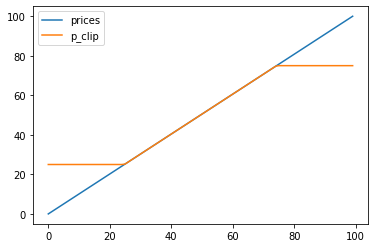

In [23]:
# clip
data_df = pd.DataFrame({'prices': np.linspace(0,100,100)})

data_df['p_clip'] = data_df.prices.clip(25,75)

data_df.plot()

### operating with list (very sueful)

http://book.pythontips.com/en/latest/map_filter.html

* map
* filter
* reduce


In [ ]:
items = [1, 2, 3, 4, 5]
squared = list(map(lambda x: x**2, items))
squared

all_rows = [(1,1,'segid1', 3.0),(1,1,'segid2', 1.0),(2,2,'segid3', 4.0)]
list(filter(lambda t: t[1] == 1, all_rows))

from functools import reduce
product = reduce((lambda x, y: x * y), [1, 2, 3, 4])
product

### Slicing or selection

pandas terminology are the indexers that do selections or subsetting: "[]", .loc and .iloc

refs:

[pandas cheat sheet](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)


https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c  

https://github.com/tdpetrou/Learn-Pandas

<img src="images/data_frame.png" width="800" align="left"/>

In [38]:
data = {
'state': ['NY','TX','FL','AL','AK','TX','TX' ],
'color': ['blue','green','red','white','gray','black','red'],
'food': [ 'Steak', 'Lamb', 'Mango', 'Apple', 'Cheese', 'Melon', 'Beans' ],
'age': [ 30, 2, 12, 4, 32, 33, 69 ],
'height': [ 165, 70, 120, 80, 180, 172, 150 ],
'score': [ 4.6, 8.3, 9.0, 3.3, 1.8, 9.5, 2.2 ]
}

df = pd.DataFrame.from_dict(data, )
df.index = ['Jane', 'Niko', 'Aaron', 'Penelope', 'Dean', 'Christina', 'Cornelia' ]

values = df.values
df

df.columns
values

,state,color,food,age,height,score
Jane,NY,blue,Steak,30,165,4.6
Niko,TX,green,Lamb,2,70,8.3
Aaron,FL,red,Mango,12,120,9.0
Penelope,AL,white,Apple,4,80,3.3
Dean,AK,gray,Cheese,32,180,1.8
Christina,TX,black,Melon,33,172,9.5
Cornelia,TX,red,Beans,69,150,2.2


Index(['state', 'color', 'food', 'age', 'height', 'score'], dtype='object')

array([['NY', 'blue', 'Steak', 30, 165, 4.6],
       ['TX', 'green', 'Lamb', 2, 70, 8.3],
       ['FL', 'red', 'Mango', 12, 120, 9.0],
       ['AL', 'white', 'Apple', 4, 80, 3.3],
       ['AK', 'gray', 'Cheese', 32, 180, 1.8],
       ['TX', 'black', 'Melon', 33, 172, 9.5],
       ['TX', 'red', 'Beans', 69, 150, 2.2]], dtype=object)

* *indexing operator: []**

In [39]:
# returns a series
# A Series is a one-dimensional sequence of labeled data. 
df['food']
    
# Select multiple columns as a DataFrame by passing a list to it
# return dataframe
# the order of the column does not matter for selecting
df[['color', 'food', 'score']]

Jane          Steak
Niko           Lamb
Aaron         Mango
Penelope      Apple
Dean         Cheese
Christina     Melon
Cornelia      Beans
Name: food, dtype: object

,color,food,score
Jane,blue,Steak,4.6
Niko,green,Lamb,8.3
Aaron,red,Mango,9.0
Penelope,white,Apple,3.3
Dean,gray,Cheese,1.8
Christina,black,Melon,9.5
Cornelia,red,Beans,2.2


* **.loc** subset rows and columns

only selects data by the LABEL of the rows and columns.


In [40]:
# Select rows  n returns serries
df.loc['Niko']

# select mutliple rows n return data frames
df.loc[['Niko', 'Penelope']]


# Slicing between range of rows
df.loc['Niko':'Dean']

# from begin to Aaron
df.loc[:'Aaron']

# from Dean to end
df.loc['Dean':]

# controling the step
df.loc['Niko':'Christina':2]

# selecting rows n columns
# df.loc[row_selection, column_selection]
df.loc[['Dean', 'Cornelia'], ['age', 'state', 'score']]

# select by criteria and column
df.loc[ df.color == "red", ['age', 'state', 'score']]

state        TX
color     green
food       Lamb
age           2
height       70
score       8.3
Name: Niko, dtype: object

,state,color,food,age,height,score
Niko,TX,green,Lamb,2,70,8.3
Penelope,AL,white,Apple,4,80,3.3


,state,color,food,age,height,score
Niko,TX,green,Lamb,2,70,8.3
Aaron,FL,red,Mango,12,120,9.0
Penelope,AL,white,Apple,4,80,3.3
Dean,AK,gray,Cheese,32,180,1.8


,state,color,food,age,height,score
Jane,NY,blue,Steak,30,165,4.6
Niko,TX,green,Lamb,2,70,8.3
Aaron,FL,red,Mango,12,120,9.0


,state,color,food,age,height,score
Dean,AK,gray,Cheese,32,180,1.8
Christina,TX,black,Melon,33,172,9.5
Cornelia,TX,red,Beans,69,150,2.2


,state,color,food,age,height,score
Niko,TX,green,Lamb,2,70,8.3
Penelope,AL,white,Apple,4,80,3.3
Christina,TX,black,Melon,33,172,9.5


,age,state,score
Dean,32,AK,1.8
Cornelia,69,TX,2.2


,age,state,score
Aaron,12,FL,9.0
Cornelia,69,TX,2.2


* **.iloc**

only uses integer locations to make its selections.

In [30]:
df.iloc[[5, 2, 4]]

df.iloc[3:5]

# Select 3rd position to end by 2:
df.iloc[3::2]

# Select two rows and two columns:
df.iloc[[2,3], [0, 4]]

# slices for both axes
df.iloc[2:5, 2:5]

df.iloc[:,2:5]

,state,color,food,age,height,score
Christina,TX,black,Melon,33,172,9.5
Aaron,FL,red,Mango,12,120,9.0
Dean,AK,gray,Cheese,32,180,1.8


,state,color,food,age,height,score
Penelope,AL,white,Apple,4,80,3.3
Dean,AK,gray,Cheese,32,180,1.8


,state,color,food,age,height,score
Penelope,AL,white,Apple,4,80,3.3
Christina,TX,black,Melon,33,172,9.5


,state,height
Aaron,FL,120
Penelope,AL,80


,food,age,height
Aaron,Mango,12,120
Penelope,Apple,4,80
Dean,Cheese,32,180


,food,age,height
Jane,Steak,30,165
Niko,Lamb,2,70
Aaron,Mango,12,120
Penelope,Apple,4,80
Dean,Cheese,32,180
Christina,Melon,33,172
Cornelia,Beans,69,150


* Selecting hierarchical columns like the ones returned by grouby

**TODO**: How to select multiple rows? 

```python 
# Example (EXAMPLE NOT IMPLEMENTED YET)
df[('loading_time','median')]

```


### Delete colum or row,  reset index,  convert to a type, concat dataframes and sort




| Pandas dtype  | Python type | NumPy type                                                     | Usage        |
|-------------- | ----------- | -------------------------------------------------------------- | -------------|
| object        | str         | string_, unicode_                                              | Text         |
| int64         | int         | int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64 | Int,numbers  |
| float64       | float       | float_, float16, float32, float64                              | Floa, numbers|
| bool          | bool        | bool_                                                          | True/False   |
| datetime64    | NA          | datetime64[ns]                                                 | Date n time  |
| timedelta[ns] | NA          | NA                                                             | Dif btw times|
| category      | NA          | NA                                                             | factors      |


In [44]:
# see more info <= BETTER THAN dtypes for inspection
# SHOWS THE AMOUNT OF MEMMORY USED BY DATAFRAME
df.info()

# drop columns
df['B'] = df.food
df['C'] = df.age

df = df.drop(columns=['B', 'C'])

#drop rows by index
df.head()
#df = df.drop([0, 1])
df.shape

# reset index
df = df.reset_index()

# see the types
df.dtypes

# convert to a type
df['Customer Number'] = df['score'].astype('int')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   7 non-null      object 
 1   state   7 non-null      object 
 2   color   7 non-null      object 
 3   food    7 non-null      object 
 4   age     7 non-null      int64  
 5   height  7 non-null      int64  
 6   score   7 non-null      float64
dtypes: float64(1), int64(2), object(4)
memory usage: 520.0+ bytes


,index,state,color,food,age,height,score
0,Jane,NY,blue,Steak,30,165,4.6
1,Niko,TX,green,Lamb,2,70,8.3
2,Aaron,FL,red,Mango,12,120,9.0
3,Penelope,AL,white,Apple,4,80,3.3
4,Dean,AK,gray,Cheese,32,180,1.8


(7, 7)

level_0      int64
index       object
state       object
color       object
food        object
age          int64
height       int64
score      float64
dtype: object

In [ ]:
# Ex: using concat (Ex not implemented yet)
pages_view = pd.concat(pages, ignore_index= True)


In [31]:
data = pd.read_csv('./data/phone_data.csv')
data.shape
data.head(3)

## Very useful for small datasets
## iterate over dataframes 
list_of_df = list()
for idx, row in data.iterrows():

    if idx % 100 == 0:
    
        print('idx; {}'.format(idx))
                
    df = pd.DataFrame({'idx': idx, 'date': row['date'], 'network': row['network']}, index=[0])
    list_of_df.append(df)

        
new_data = pd.concat(list_of_df, ignore_index=True)

new_data.head(3)

(830, 7)

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile


idx; 0
idx; 100
idx; 200
idx; 300
idx; 400
idx; 500
idx; 600
idx; 700
idx; 800


,idx,date,network
0,0,15/10/14 06:58,data
1,1,15/10/14 06:58,Vodafone
2,2,15/10/14 14:46,Meteor


In [ ]:
# Ex: sort
df.sort_values(['a', 'b'], ascending=[True, False])

### Work with category (factors) data

https://pbpython.com/categorical-encoding.html

* How to convert to category
* Label encoding
* One hot encode
* to_category()


Only if I see values
See this article http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/
and the package is here http://contrib.scikit-learn.org/categorical-encoding/
    
    

In [25]:
## factorize: convert to numerical 
neighbourhood = ["dowtown","false creek", "west end", "north van"]

pd.factorize(neighbourhood)


# One hot encode to dummy
pd.get_dummies(neighbourhood)


(array([0, 1, 2, 3]),
 array(['dowtown', 'false creek', 'west end', 'north van'], dtype=object))

,dowtown,false creek,north van,west end
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0


### Missings

refs:
* https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html


Calculating with missings

* When summing data, NA (missing) values will be treated as zero.
* If the data are all NA, the result will be 0
* Cumulative methods like cumsum() and cumprod() ignore NA values by default, but preserve them in the resulting arrays.

* NA groups in GroupBy are automatically excluded. This behavior is consistent with R, 


In [6]:
## XXX: Becarefull

None == None

np.nan == np.nan

True

False

In [14]:
bikes = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)

bikes.columns = ['West', 'East']

bikes.shape


# visualizing missing at least one column is missing
bikes[bikes.isnull().any(axis=1)].head()


# removing
bikes = bikes.dropna()
bikes.shape

bikes.head()

(56160, 2)

,West,East
Date,,
2018-03-11 02:00:00,NaN,NaN
2017-03-12 02:00:00,NaN,NaN
2016-03-13 02:00:00,NaN,NaN
2015-04-21 12:00:00,NaN,NaN
2015-04-21 11:00:00,NaN,NaN


(56151, 2)

,West,East
Date,,
2019-02-28 23:00:00,5.0,6.0
2019-02-28 22:00:00,4.0,27.0
2019-02-28 21:00:00,16.0,32.0
2019-02-28 20:00:00,16.0,50.0
2019-02-28 19:00:00,39.0,59.0


### Interpolation

In [7]:
ts = pd.DataFrame({'values': [1, 2, 3, np.nan, np.nan, 6,7,8]},
                  index=['2020-02-01','2020-02-02','2020-02-03','2020-02-04','2020-02-05','2020-02-06','2020-02-07','2020-02-08'])

ts

ts.interpolate()

,values
2020-02-01,1.0
2020-02-02,2.0
2020-02-03,3.0
2020-02-04,NaN
2020-02-05,NaN
2020-02-06,6.0
2020-02-07,7.0
2020-02-08,8.0


,values
2020-02-01,1.0
2020-02-02,2.0
2020-02-03,3.0
2020-02-04,4.0
2020-02-05,5.0
2020-02-06,6.0
2020-02-07,7.0
2020-02-08,8.0


### duplicates

In [ ]:
data = {'col_1': [3, 2, 3, 0], 'col_2': ['a', 'b', 'a', 'd']}

df = pd.DataFrame.from_dict(data)
df.head()

# last or first <= default or False = drop all cases
# subset to ignore olther columns while considering duplicated
df = df.drop_duplicates(keep='last',subset=['col_1','col_2'])

df.head()

* **Find duplicated for expecting what is happening**  

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

In [71]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
    
df
  
print('Default only the 2nd  occurency is labeled as duplicated')
df.duplicated()

print('Suing last change the behavior')
df.duplicated(keep='last')

print('keep label all occurrency as duplicated ')
df.duplicated(keep=False)


print('You can consider only a list of columns')
df.duplicated(subset=['brand'])

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


Default only the 2nd  occurency is labeled as duplicated


0    False
1     True
2    False
3    False
4    False
dtype: bool

Suing last change the behavior


0     True
1    False
2    False
3    False
4    False
dtype: bool

keep label all occurrency as duplicated 


0     True
1     True
2    False
3    False
4    False
dtype: bool

You can consider only a list of columns


0    False
1     True
2    False
3     True
4     True
dtype: bool

### Path manipulations

http://pbpython.com/pathlib-intro.html


<img src="images/pathlib_cheatsheet_p1.png" width="650" align="left"/>

In [1]:
from pathlib import Path

in_file_1 = Path.cwd() / "in" / "input.xlsx"

print('file: {}'.format(in_file_1))
print('basename : {}'.format(in_file_1.name))
print('stem : {}'.format(in_file_1.stem))
print('.ext : {}'.format(in_file_1.suffix))
print('dirname : {}'.format(in_file_1.parent))
print('up : {}'.format(in_file_1.parent.stem))


p = Path.cwd()

print('logical checks: is a dir , is a file?')
p.is_dir()

p.is_file()


print('Get parts (split)')
p.parts


print('paths, parents ...')
p.absolute()

p.parent

p.as_uri()


file: /mnt/sdb1/leandro/ds_pragmatic_programming.txt/in/input.xlsx
basename : input.xlsx
stem : input
.ext : .xlsx
dirname : /mnt/sdb1/leandro/ds_pragmatic_programming.txt/in
up : in
logical checks: is a dir , is a file?
Get parts (split)
paths, parents ...


<function print>

### String manipulation 

ref: 
* https://www.regular-expressions.info/named.html
* https://howchoo.com/g/ymfhmtrhyjg/python-regexes-match-objects <= **TODO**

* better way to work with regex
* basic string manipulation
* vectorized string manipulation
  (take notes of the pros n crons)
    
    https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html

    

In [1]:
import re

address = 'Hello, Tanagara da Serra 95014'

# named capturing groups: (?P<city>.+?)
city_zip_code_regex = r'.*,\s*(?P<city>.+?)\s*(?P<zip_code>\d{5})?$'
matches = re.match(city_zip_code_regex, address)

matches['city'] 
matches['zip_code']


'95014'

* **f-string**

In [1]:
val = 12.3

print(f'{val:.2f}')
print(f'{val:.5f}')

12.30
12.30000


* **pandas series**

In [11]:
import re

s1 = pd.Series(['bear', 'bat','Mouse', 'dog', 'house and parrot', '23', np.NaN])

# ignore case
s1.str.contains('PARROT', flags=re.IGNORECASE, regex=True)

# any digit
s1.str.contains('\\d', regex=True)

# or dog or cat and na  False
s1.str.contains('house|dog',na=False, regex=True)

# start or end with
s1.str.startswith('b')
s1.str.endswith('t')


0    False
1    False
2    False
3    False
4     True
5    False
6      NaN
dtype: object

0    False
1    False
2    False
3    False
4    False
5     True
6      NaN
dtype: object

0    False
1    False
2    False
3     True
4     True
5    False
6    False
dtype: bool

0     True
1     True
2    False
3    False
4    False
5    False
6      NaN
dtype: object

0    False
1     True
2    False
3    False
4     True
5    False
6      NaN
dtype: object

### apply, map and lambda function 


In [ ]:
data = pd.read_csv('./data/phone_data.csv', index_col=False)
data.shape

data.head(5)

In [ ]:
data['dur_min'] = data.duration.map(lambda d: d/60.00)

data['concat'] = data.apply(lambda r: r['network'] + '-' + r['item'], axis=1)

# apply with args
def _foo(row,const_str):
    net = row['network']
    return net + '-' +  const_str
    
data['concat'] = data.apply(_foo, args=('const',), axis=1)


data.head(5)

## Data summarizations and merge data

### Summarize data


* descriptive (tables)
* groupby
* count frequency 


In [32]:
data = pd.read_csv('./data/phone_data.csv')
data.date = pd.to_datetime(data.date)

data.shape
data.info()
data.head(5)

(830, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 7 columns):
index           830 non-null int64
date            830 non-null datetime64[ns]
duration        830 non-null float64
item            830 non-null object
month           830 non-null object
network         830 non-null object
network_type    830 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 45.5+ KB


,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


#### Count frequency

In [13]:
data.item.unique()
print()
data.item.value_counts()

array(['data', 'call', 'sms'], dtype=object)

call    388
sms     292
data    150
Name: item, dtype: int64

#### Groupby



Split-Apply-Combine

<img src="images/split-apply-combine.png" width="400" align="left"/>


In [14]:
# One option is to compute the group by and compute aggregation laetr as you code
# this approachh looks betetr in data wrangling and for plot the results
g = data.groupby(['month', 'item'])

# group.size is convenient
g.size()
print()
g.mean()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
dtype: int64

index    duration
month   item                        
2014-11 call  102.467290  238.757009
        data  100.758621   34.429000
        sms   132.457447    1.000000
2014-12 call  312.974684  171.658228
        data  307.533333   34.429000
        sms   300.229167    1.000000
2015-01 call  489.931818  193.977273
        data  472.548387   34.429000
        sms   494.139535    1.000000
2015-02 call  656.641791  215.164179
        data  656.774194   34.429000
        sms   667.769231    1.000000
2015-03 call  773.659574  462.276596
        data  779.896552   34.429000
        sms   788.000000    1.000000

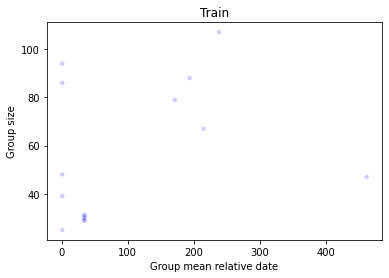

In [16]:
plt.figure()
plt.scatter(g.duration.mean(),g.size(),edgecolor = 'none',alpha = 0.2, s=20, c='b')
plt.xlabel('Group mean relative date')
plt.ylabel('Group size')
plt.title('Train');

In [44]:
# XXX: DEPRECATED THIS SYNTAX. 
# TODO: HOW TO ACHIVE THE SAME COMPUTATION WITH THE NEW SYNTA
# Group the data frame by month and item and extract a number of stats from each group
data.groupby(['month', 'item'], as_index=False).aggregate({
                                     'duration': ['min', 
                                                  ('1q', lambda x: np.percentile(x,25)),
                                                  ('median', np.median),
                                                  ('3q', lambda x: np.percentile(x,75)), 
                                                  ('max', max),
                                                  ('std', np.std), 
                                                  ('cv', lambda x: np.median(x)/np.std(x)),
                                                  ('idx_max', lambda x: x.idxmax()),
                                                  ('date_of_max', lambda x: data.loc[x.idxmax(),['date']])],
                                     'date':  ['first', # get the first row. Good if it is ordered 
                                               'min', # get the first date
                                               'last','max',
                                              ('most_recent_duration', lambda x: data.loc[x.argmin(), ['duration']])],       
                                     'network_type': ['nunique', 'count']
                                        }).sort_values(by=[('duration','min')],ascending=False, na_position='last').head(7)


/home/leandroohf/algo-pricing/algo-env3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/leandroohf/algo-pricing/algo-env3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  app.launch_new_instance()


month  item duration                                                 \
                       min      1q  median       3q       max         std   
1   2014-11  data   34.429  34.429  34.429   34.429    34.429    0.000000   
4   2014-12  data   34.429  34.429  34.429   34.429    34.429    0.000000   
7   2015-01  data   34.429  34.429  34.429   34.429    34.429    0.000000   
10  2015-02  data   34.429  34.429  34.429   34.429    34.429    0.000000   
13  2015-03  data   34.429  34.429  34.429   34.429    34.429    0.000000   
3   2014-12  call    2.000  10.500  55.000  152.000  2120.000  324.731798   
6   2015-01  call    2.000  15.500  55.500  273.500  1859.000  300.671661   

                                                            date  \
              cv idx_max         date_of_max               first   
1   4.845451e+15     0.0 2014-10-15 06:58:00 2014-10-15 06:58:00   
4   4.845451e+15   228.0 2014-11-13 06:58:00 2014-11-13 06:58:00   
7            inf   381.0 2014-12-13 06:58:00 2014-12-13 06:58:00   
10           inf   577.0 2015-01-13 06:58:00 2015-01-13 06:58:00   
13  4.845451e+15   731.0 2015-02-13 06:58:00 2015-02-13 06:58:00   
3   1.704528e-01   252.0 2014-11-19 18:56:00 2014-11-14 17:24:00   
6   1.856445e-01   398.0 2014-12-17 18:08:00 2014-12-15 20:03:00   

                                                                \
                   min                last                 max   
1  2014-01-11 06:58:00 2014-12-11 06:58:00 2014-12-11 06:58:00   
4  2014-01-12 06:58:00 2014-12-12 06:58:00 2014-12-12 06:58:00   
7  2014-12-13 06:58:00 2015-12-01 06:58:00 2015-12-01 06:58:00   
10 2015-01-02 06:58:00 2015-12-02 06:58:00 2015-12-02 06:58:00   
13 2015-01-03 06:58:00 2015-03-13 06:58:00 2015-12-03 06:58:00   
3  2014-02-12 11:40:00 2014-12-14 19:54:00 2014-12-14 19:54:00   
6  2014-12-15 20:03:00 2015-01-14 20:47:00 2015-12-01 18:23:00   

                        network_type        
   most_recent_duration      nunique count  
1                34.429            1    29  
4                34.429            1    30  
7                34.429            1    31  
10               34.429            1    31  
13               34.429            1    29  
3               526.000            3    79  
6                 4.000            3    88

In [43]:
df2 = data[(data.month == "2014-11") & (data.network == "data")]

df2.sort_values(by=["date"],ascending=False).tail(5)

,index,date,duration,item,month,network,network_type
151,151,2014-05-11 06:58:00,34.429,data,2014-11,data,data
131,131,2014-04-11 06:58:00,34.429,data,2014-11,data,data
120,120,2014-03-11 06:58:00,34.429,data,2014-11,data,data
114,114,2014-02-11 06:58:00,34.429,data,2014-11,data,data
111,111,2014-01-11 06:58:00,34.429,data,2014-11,data,data


#### crosstab

In [7]:
data[['network_type','item']].head(5)

pd.crosstab(data.network_type, data.item, margins=True, margins_name="Total")

pd.crosstab(data.network_type, data.item, normalize=True)

,network_type,item
0,data,data
1,mobile,call
2,mobile,call
3,mobile,call
4,mobile,call


item,call,data,sms,Total
network_type,,,,
data,0,150,0,150
landline,42,0,0,42
mobile,319,0,282,601
special,0,0,3,3
voicemail,27,0,0,27
world,0,0,7,7
Total,388,150,292,830


item,call,data,sms
network_type,,,
data,0.000000,0.180723,0.000000
landline,0.050602,0.000000,0.000000
mobile,0.384337,0.000000,0.339759
special,0.000000,0.000000,0.003614
voicemail,0.032530,0.000000,0.000000
world,0.000000,0.000000,0.008434


**comparing with groub by and pivot table**

crosstabe is more easy to read and do not have the extr steps

In [5]:
pd.crosstab(data.network_type, data.item)

data.groupby(['network_type', 'item'])['network_type'].count().unstack().fillna(0)

data.pivot_table(index='item', columns='network_type', aggfunc={'network_type':len}, fill_value=0)


item,call,data,sms
network_type,,,
data,0,150,0
landline,42,0,0
mobile,319,0,282
special,0,0,3
voicemail,27,0,0
world,0,0,7


item,call,data,sms
network_type,,,
data,0.0,150.0,0.0
landline,42.0,0.0,0.0
mobile,319.0,0.0,282.0
special,0.0,0.0,3.0
voicemail,27.0,0.0,0.0
world,0.0,0.0,7.0


network_type                                        
network_type         data landline mobile special voicemail world
item                                                             
call                    0       42    319       0        27     0
data                  150        0      0       0         0     0
sms                     0        0    282       3         0     7

#### pivot table

http://pbpython.com/pandas-pivot-table-explained.html



<img src="images/pivot-table-datasheet.png" width="500" align="left"/>

In [ ]:
# # convert wide to long format (R: melt unmelt)
table = pd.pivot_table(data,index=["item","network_type"],
               values=["duration"],
               aggfunc=[np.sum,np.mean],fill_value=0,margins=True)

table

In [ ]:
table.query('network_type == ["data", "sms", "mobile"]')

### Joins


left , right n inner join

| Merge method | SQL Join Name    | Description                               |  
|--------------|----------------- |-------------------------------------------|  
| left         | LEFT OUTER JOIN  | Use keys from left frame only             |  
| right        | RIGHT OUTER JOIN | Use keys from right frame only            |  
| outer        | FULL OUTER JOIN  | Use union of keys from both frames        |  
| inner        | INNER JOIN       | Use intersection of keys from both frames |



In [ ]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'], 
                     'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],  
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

result = pd.merge(left, right, how='left', on=['key1', 'key2'])

left

right

result

### Cartesian product or cross join

In [67]:
df1 = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3']})


df2 = pd.DataFrame({'key1': ['Q0', 'Q1', 'Q2', 'Q3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})


# Add dummy key
df1['_tmpkey'] = 1
df2['_tmpkey'] = 1

cartesian_df = pd.merge(df1[['_tmpkey',"A"]], df2[['_tmpkey',"B"]], on='_tmpkey').drop('_tmpkey', axis=1)
#cartesian_df.index = pd.MultiIndex.from_product((df1.index, df2.index))
cartesian_df = cartesian_df.reset_index(drop=True)

df1.drop('_tmpkey', axis=1, inplace=True)
df2.drop('_tmpkey', axis=1, inplace=True)

cartesian_df.head(11)

,A,B
0,A0,B0
1,A0,B1
2,A0,B2
3,A0,B3
4,A1,B0
5,A1,B1
6,A1,B2
7,A1,B3
8,A2,B0
9,A2,B1


### Explode columns

https://medium.com/analytics-vidhya/every-dataframe-manipulation-explained-visualized-intuitively-dbeea7a5529e

<img src="images/explode_column.png" width="600" align="left"/>

In [22]:
print('Original')
df = pd.DataFrame({'A': [[1,2],'foo', [],['a','b']], 'B': [1,2,3,4]})
df

print()
print('Exploding column A')
df.explode('A')

Original


,A,B
0,"[1, 2]",1
1,foo,2
2,[],3
3,"[a, b]",4



Exploding column A


,A,B
0,1,1
0,2,1
1,foo,2
2,NaN,3
3,a,4
3,b,4


### Stack and Unstack

https://medium.com/analytics-vidhya/every-dataframe-manipulation-explained-visualized-intuitively-dbeea7a5529e


**Convert long format to wqide format (R: melt and unmelt)**

<img src="images/unstack.png" width="600" align="left"/>

In [3]:
print('Original')
df = pd.DataFrame({'a': [1.0,2.0], 'b': [3.0,4.0]}, index=['one', 'two'])
df

print()
print('Stacking')
df_stacked = df.stack()
df_stacked

print()
print('Unstacking')
df_stacked.unstack()

Original


,a,b
one,1.0,3.0
two,2.0,4.0



Stacking


one  a    1.0
     b    3.0
two  a    2.0
     b    4.0
dtype: float64


Unstacking


,a,b
one,1.0,3.0
two,2.0,4.0


### Run sql wueries on pandas dataframe

* like sqldf in R 

[ds_pragmatic_programming_SQL.ipynb](ds_pragmatic_programming_SQL)


## High performance eval n query

https://jakevdp.github.io/PythonDataScienceHandbook/03.12-performance-eval-and-query.html

Motivations
for large df n arrays eval n query are faster


### Parallelized Pandas Dataframe operation with multithreating

In [ ]:
#https://towardsdatascience.com/make-your-own-super-pandas-using-multiproc-1c04f41944a1
from multiprocessing import  Pool

def parallelize_dataframe(df, func, n_cores=4):
    
    df_split = np.array_split(df, n_cores)
    
    pool = Pool(n_cores)
    
    df = pd.concat(pool.map(func, df_split))
    
    pool.close()
    pool.join()
    
    return df

In [ ]:
%%time

train = parallelize_dataframe(train_df, add_features)

### Cython


```sh
!pip install cython fortran-magic

```

In [54]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [58]:
%%cython
def cython_myltiply_by_2(float x):
    return 2.0 * x

In [59]:
def myltiply_by_2(x):
    return 2.0 * x

In [63]:
n_times = 10000

In [64]:
%%time

for k in range(n_times):
    _ = cython_myltiply_by_2(23.0)

CPU times: user 0 ns, sys: 648 µs, total: 648 µs
Wall time: 653 µs


In [65]:
%%time

for k in range(n_times):
    _ = myltiply_by_2(23.0)

CPU times: user 48 µs, sys: 862 µs, total: 910 µs
Wall time: 914 µs


## Process large data set by chunks

refs:
* https://medium.com/towards-artificial-intelligence/efficient-pandas-using-chunksize-for-large-data-sets-c66bf3037f93


In [2]:
# Get the data
!wget -O moviedataset.zip https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/moviedataset.zip
print('unziping ...')
!unzip -o -j moviedataset.zip

--2020-11-06 20:11:02--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/moviedataset.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160301210 (153M) [application/zip]
Saving to: ‘moviedataset.zip’

moviedataset.zip    100%[===================>] 152.88M  1.13MB/s    in 79s     

2020-11-06 20:12:22 (1.93 MB/s) - ‘moviedataset.zip’ saved [160301210/160301210]

unziping ...
Archive:  moviedataset.zip
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: README.txt              
  inflating: tags.csv                


In [17]:
%%time
ratings_df = pd.read_csv('ratings.csv')
print(ratings_df.shape)

ratings_memory = ratings_df.memory_usage().sum()/1e6
# Let's print out the memory consumption
print('Total Current memory is-', ratings_memory,'MB.')

ratings_df.head(5)

(22884377, 4)
Total Current memory is- 732.300192 MB.
CPU times: user 2.83 s, sys: 5.76 s, total: 8.59 s
Wall time: 8.6 s


,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


In [10]:
# Let's get a list of the rating scale or keys
rate_keys = list(ratings_df['rating'].unique())
# let's sort the ratings keys from highest to lowest.
rate_keys = sorted(rate_keys, reverse=True) 
 
print(rate_keys)

ratings_dict = {}
for i in rate_keys: ratings_dict[i] = 0

ratings_dict

[5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5]


{5.0: 0,
 4.5: 0,
 4.0: 0,
 3.5: 0,
 3.0: 0,
 2.5: 0,
 2.0: 0,
 1.5: 0,
 1.0: 0,
 0.5: 0}

* **What’s the most common movie rating from 0.5 to 5.0**

In [15]:
%%time
# Initialise a variable to compute average bytes per chunk
ave_bytes = 0

# then we initialise our loop counter
count = 0

# Specifying chunksize in read_csv, the return value will be an iterable object of type TextFileReader
# This enumerate function selects repeated chunks of 1,000,000 rows of data 
# start means start with first chunk
for index, chunk in enumerate(pd.read_csv('ratings.csv', chunksize= 1000000),start=1):
    # We add total memory per chunk to ave_bytes
    ave_bytes += chunk.memory_usage().sum()
    
    # This inner loop iterates through the rate keys only.Then it does 
    # vectorised selections on the dataframe to select count of each rate key.
    for i in rate_keys:
        count = len(chunk[chunk['rating'] == i])
        ratings_dict[i] += count
        
print("Total number of chunks:",index)
ave_bytes = ave_bytes / index
print(f"Average bytes per loop: {ave_bytes/1e6:.2f} MB")
print(f'Movie ratings: {ratings_dict}')


Total number of chunks: 23
Average bytes per loop: 31.84 MB
Movie ratings: {5.0: 16791090, 4.5: 9069610, 4.0: 31328115, 3.5: 12961875, 3.0: 23919495, 2.5: 5220880, 2.0: 8016270, 1.5: 1688025, 1.0: 3848270, 0.5: 1578255}
CPU times: user 4.04 s, sys: 0 ns, total: 4.04 s
Wall time: 4.04 s
